In [23]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [24]:
#importing training dataset
train = pd.read_csv("customer_churn_dataset-training-master.csv")
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

Pre-processing

In [25]:
#showing first few rows of dataset

train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [26]:
#figure out how many different values are in the columns with string datatype

unique_gender = train["Gender"].unique()

print("Unique values in Gender column:", unique_gender)

unique_subtype = train["Subscription Type"].unique()

print("Unique values in Subscription Type column:", unique_subtype)

unique_contractLenght = train["Contract Length"].unique()

print("Unique values in Contract Length column:", unique_contractLenght)

Unique values in Gender column: ['Female' 'Male' nan]
Unique values in Subscription Type column: ['Standard' 'Basic' 'Premium' nan]
Unique values in Contract Length column: ['Annual' 'Monthly' 'Quarterly' nan]


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [28]:
#There are nan values in columns -> check for nan values in every column
train.isna().sum()
#as only 1 all entries with missing value can be deleted without significant loss of information

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [29]:
#drop missing values
train.dropna(inplace=True)

In [30]:
#replace string values with int

#train["Gender"] = train["Gender"].replace({"Female":1, "Male":2})
#train["Subscription Type"] = train["Subscription Type"].replace({"Standard":1, "Basic":2, "Premium":3})
#train["Contract Length"] = train["Contract Length"].replace({"Annual":1, "Quarterly":2, "Monthly":3})

In [31]:
labelencoder = LabelEncoder()
train["Gender"] = labelencoder.fit_transform(train["Gender"])
train["Subscription Type"] = labelencoder.fit_transform(train["Subscription Type"])
train["Contract Length"] = labelencoder.fit_transform(train["Contract Length"])


Outlier Detection

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Usage Frequency'}>,
        <Axes: title={'center': 'Support Calls'}>],
       [<Axes: title={'center': 'Payment Delay'}>,
        <Axes: title={'center': 'Subscription Type'}>,
        <Axes: title={'center': 'Contract Length'}>],
       [<Axes: title={'center': 'Total Spend'}>,
        <Axes: title={'center': 'Last Interaction'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

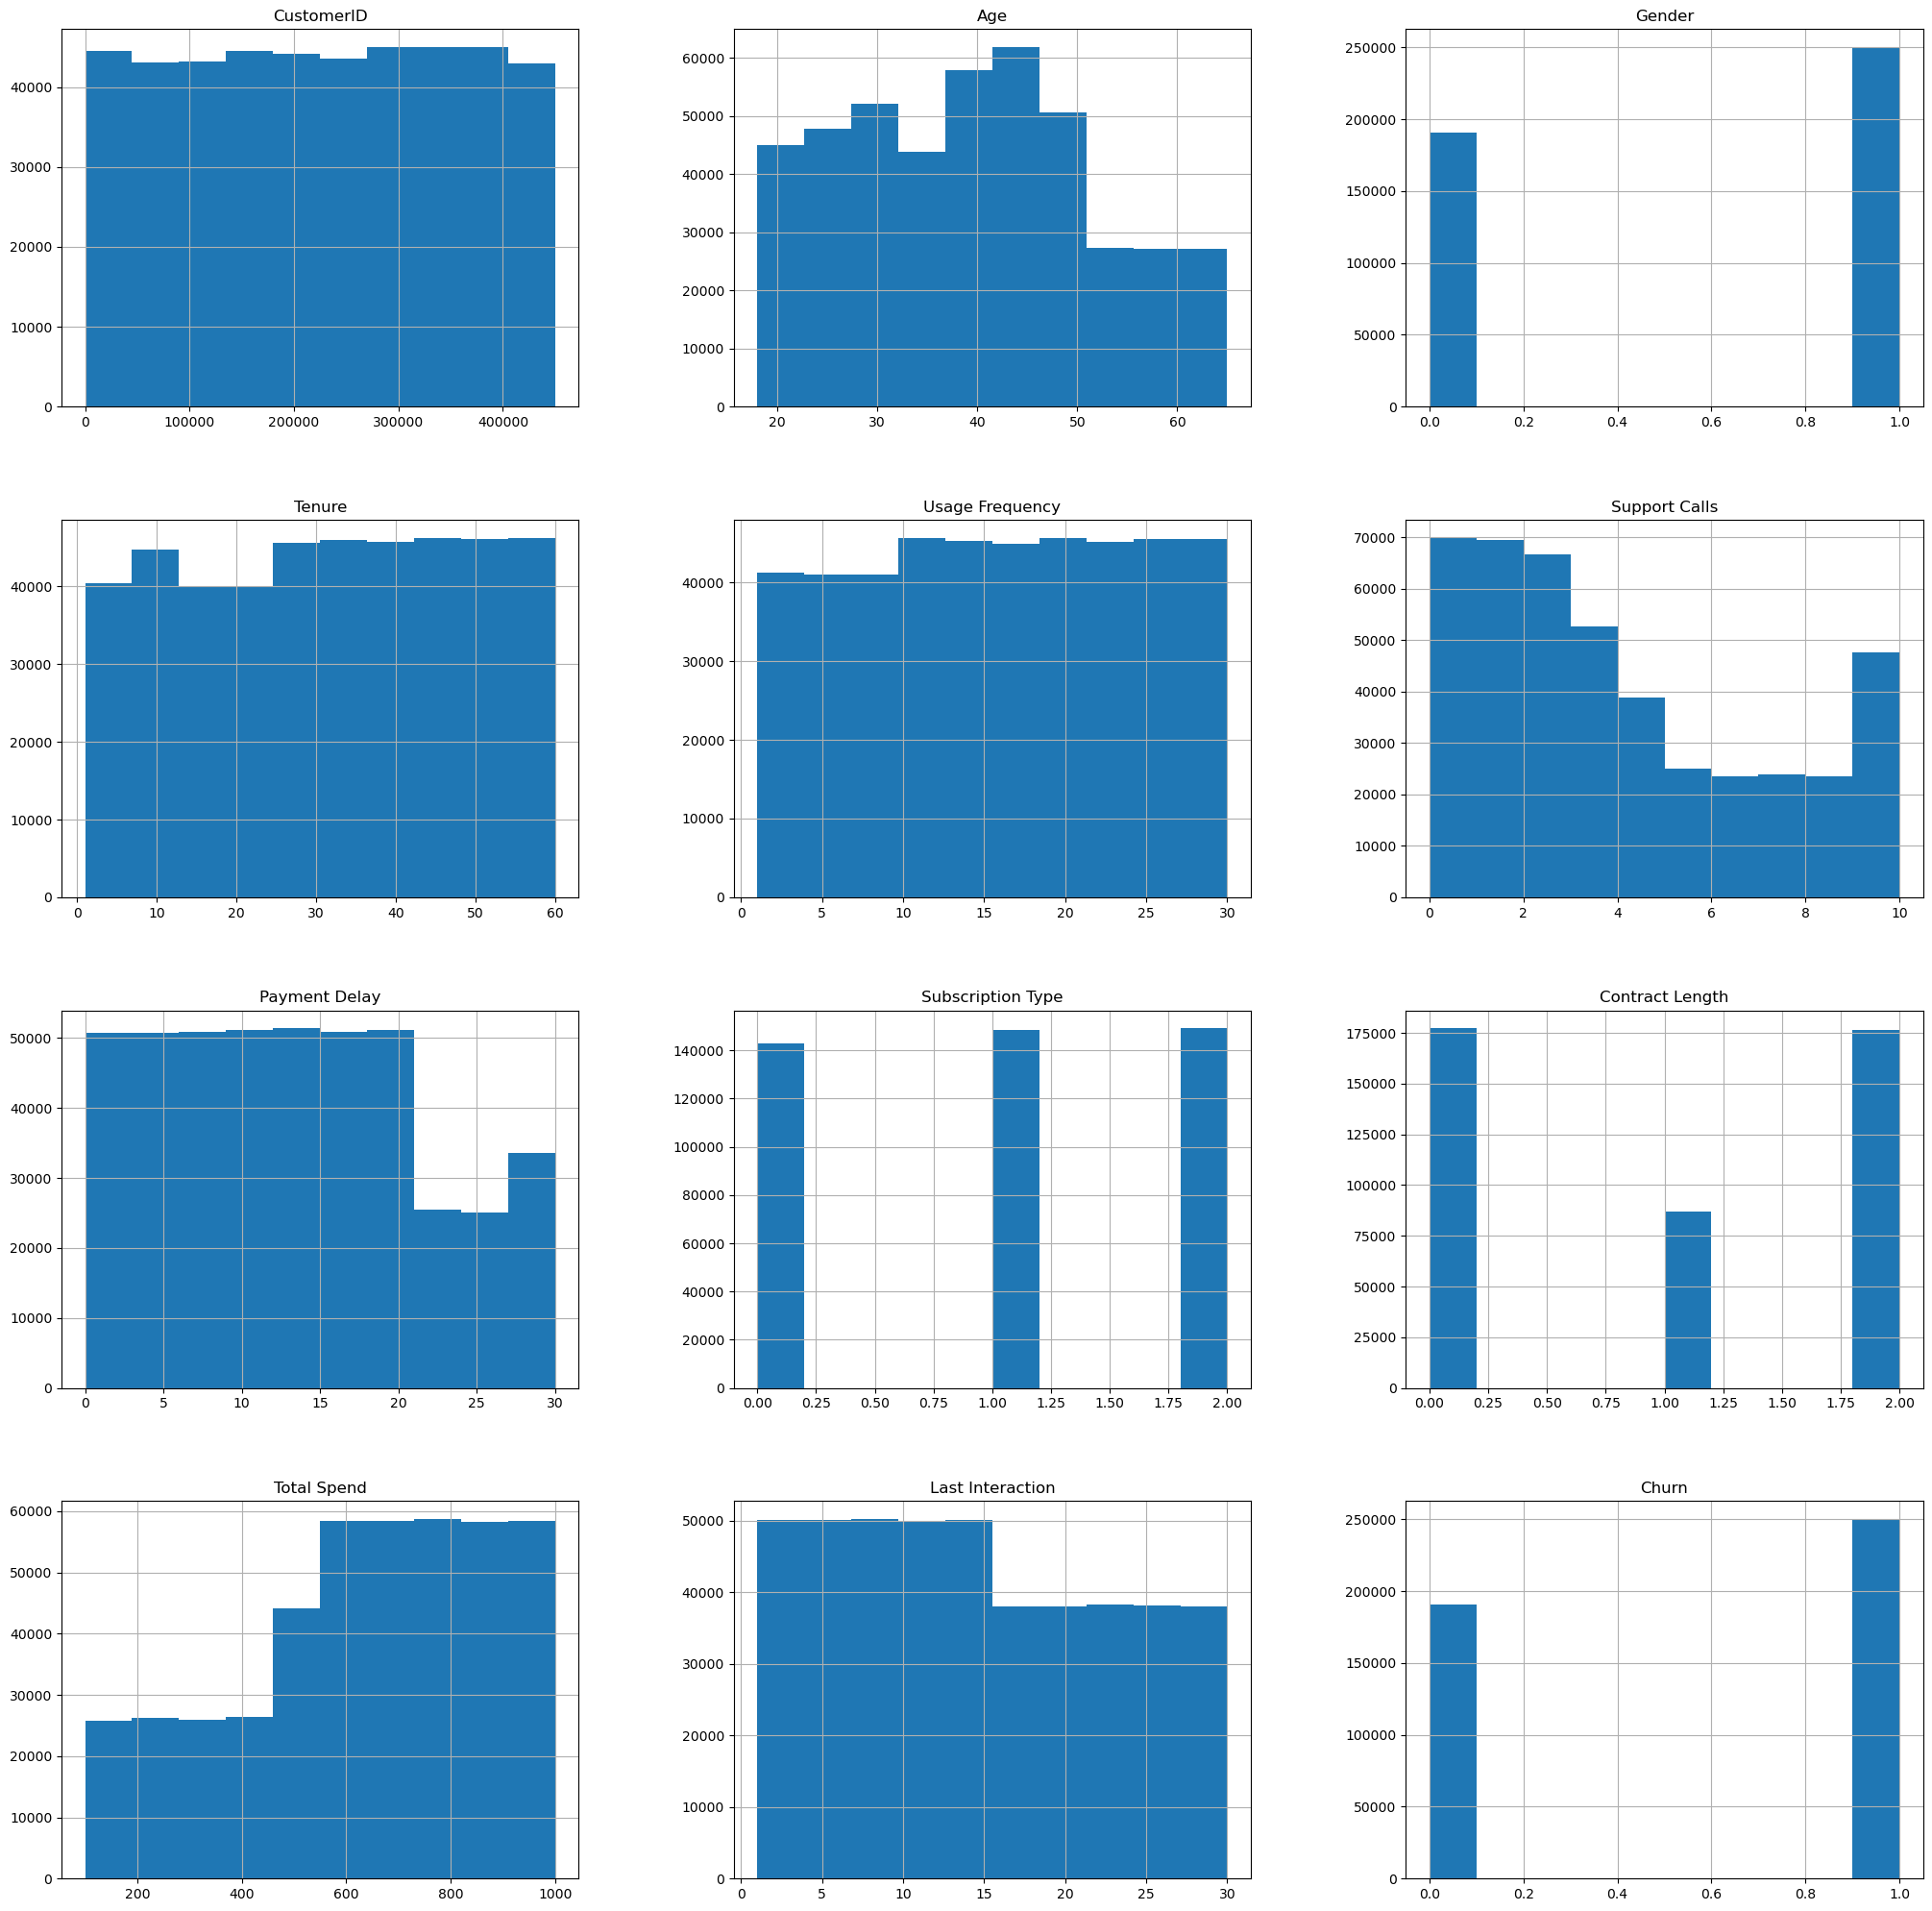

In [32]:
# Distribution with historgrams 
train.hist(bins=10, figsize=(25,25))
#good balance in target variable churn 
#other columns also good balanced and not outlier can be detected visually

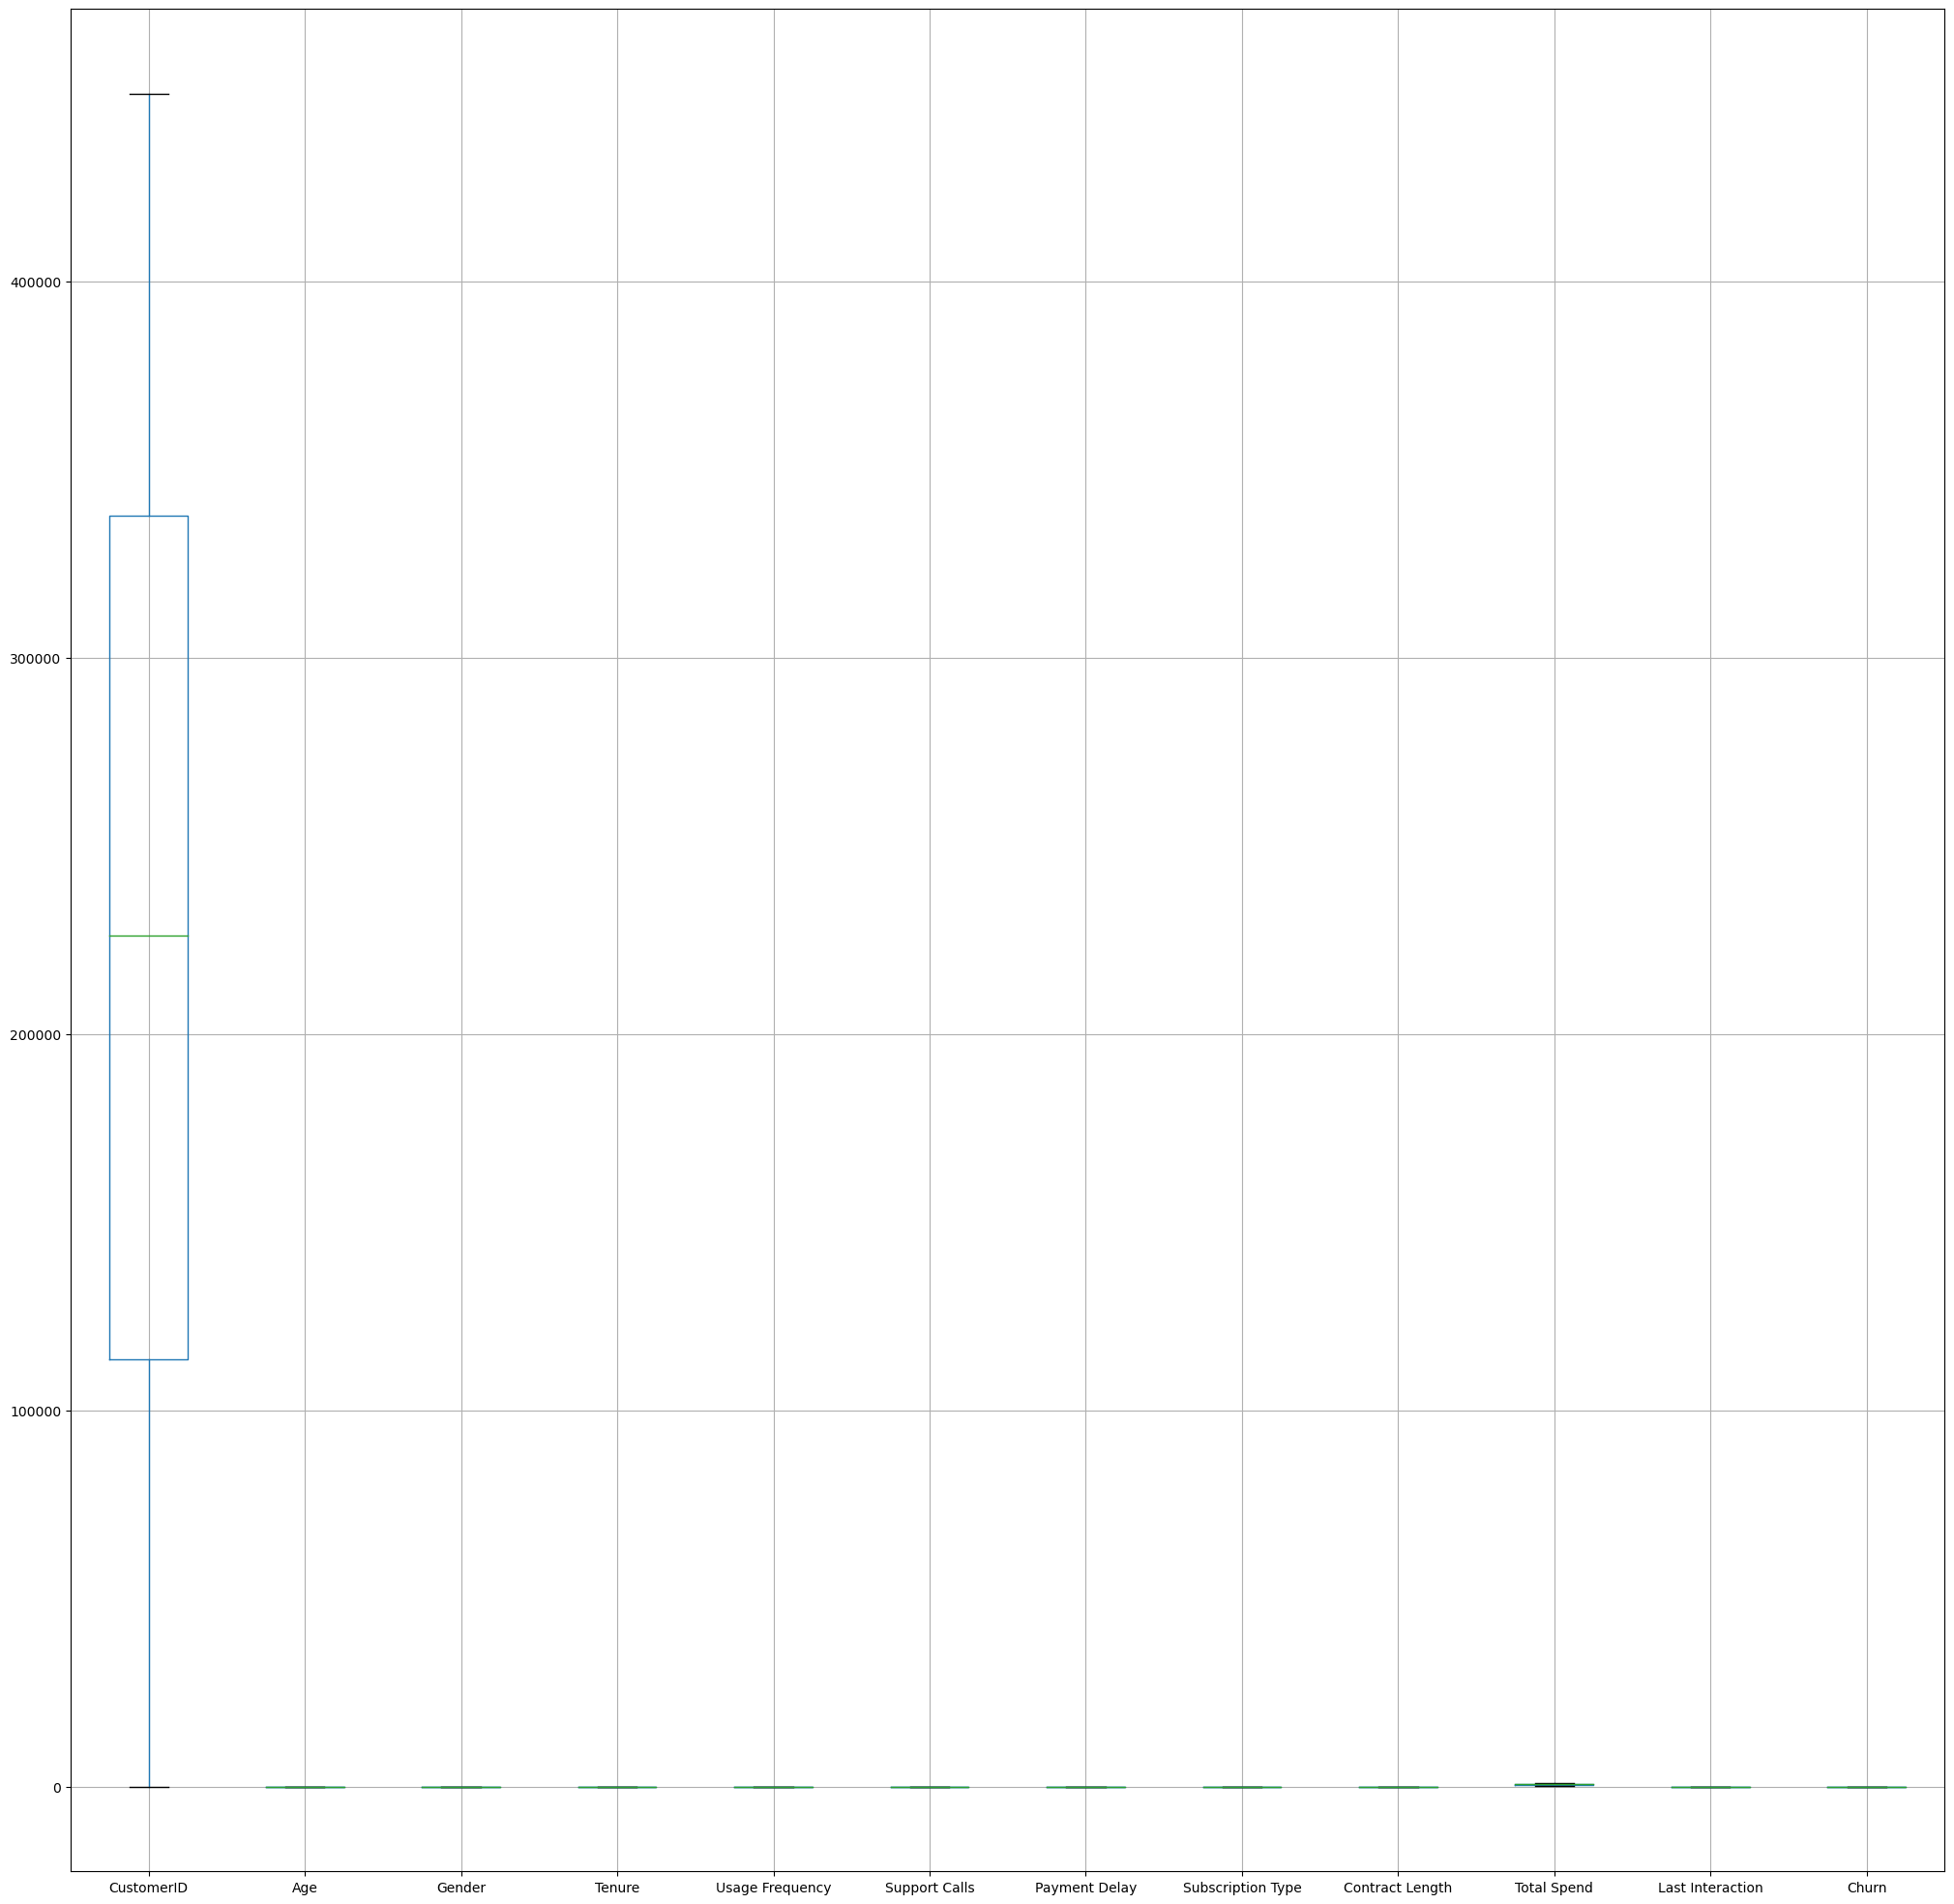

In [33]:
#boxplot confirms absence of outliers
train.boxplot(figsize=(25,25))
plt.show()


Feature selection

In [34]:
#correlation matrix to see which features are highly correlated to the churn feature
corr_matrix = train.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn                1.000000
Support Calls        0.574267
Payment Delay        0.312129
Age                  0.218394
Last Interaction     0.149616
Contract Length     -0.000093
Subscription Type   -0.017181
Usage Frequency     -0.046101
Tenure              -0.051919
Gender              -0.175395
Total Spend         -0.429355
CustomerID          -0.839365
Name: Churn, dtype: float64

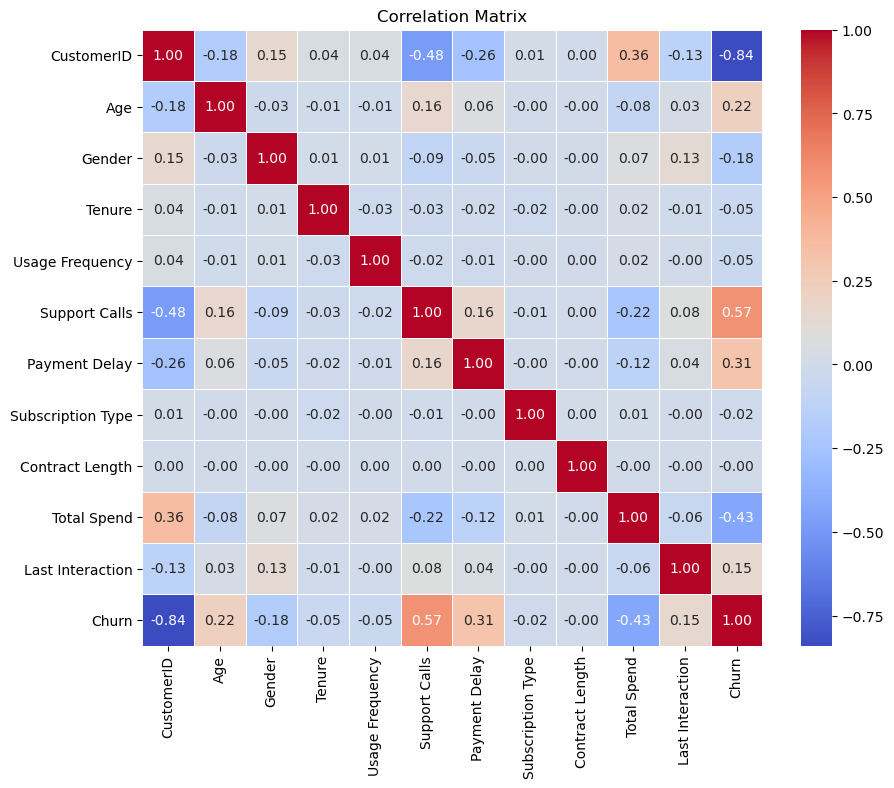

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
#high positive correlation with number of support calls and payment delays
#considerable negative correlation with total amount spend

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [37]:
#standardization is not required but recommended for PCA as it ensures that featrues
#with larger scalde do not dominate analysis
#scaler = StandardScaler()
#train_standardized = scaler.fit_transform(train)

pcadf = train.drop(columns="Churn")
pca = PCA()
pca.fit(pcadf)
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)


[9.99996950e-01 3.00984346e-06 1.77168545e-08 8.92167722e-09
 4.38313519e-09 4.33721763e-09 3.77786617e-09 4.25405216e-10
 4.78249356e-11 3.94578904e-11 1.39456176e-11]


In [41]:
pcadf.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0


In [38]:
#scaler = StandardScaler()
#train_standardized = scaler.fit_transform(train)
#
## Perform PCA
#pca = PCA()
#pca.fit(train_standardized)
#
## Get explained variance ratio and feature names
#explained_variance_ratio = pca.explained_variance_ratio_
#feature_names = train.columns

In [39]:
# Create a bar chart with feature names
#plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
#plt.xlabel('Principal Component')
#plt.figure(figsize=(10, 6))
#plt.ylabel('Explained Variance Ratio')
#plt.title('Explained Variance Ratio per Principal Component')
#
## Annotate the bar chart with feature names
#for i, evr in enumerate(explained_variance_ratio):
#    plt.annotate(f"{feature_names[i]}: {evr:.2f}", (i + 1, evr), textcoords="offset points", xytext=(0, 10), ha='center')
#
#plt.show()

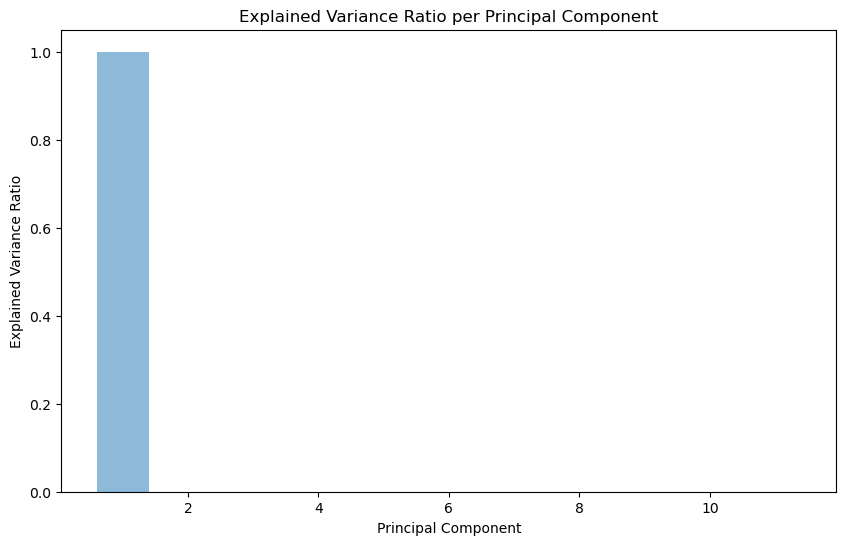

In [42]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()
